# Preprocessing dengan metode mengisi nilai missing value dan visualisasi pada data suatu perusahaan asuransi

## Preprocessing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import Imputer
from scipy.stats import mode

In [2]:
df=pd.read_csv("C:/Users/EKO NOLIMIT/Downloads/data_mining_1.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


mengecek apakah terdapat missing value atau tidak

In [4]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#membaca informasi agar dapat diketahui ada missing values atau tidak sama seperti sebelumnya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Statistika deskriptif dari data

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Statistika Deskriptif Untuk Modus dari data variabel yang bersifat kategorik dan terdapat Missing value

In [7]:
df["Gender"].mode()

0    Male
dtype: object

In [8]:
df["Married"].mode()

0    Yes
dtype: object

In [9]:
df["Dependents"].mode()

0    0
dtype: object

In [10]:
df["Self_Employed"].mode()

0    No
dtype: object

In [11]:
df["Credit_History"].mode()

0    1.0
dtype: float64

In [12]:
df["Loan_Amount_Term"].mode()

0    360.0
dtype: float64

boxplot untuk mengecek outlier 

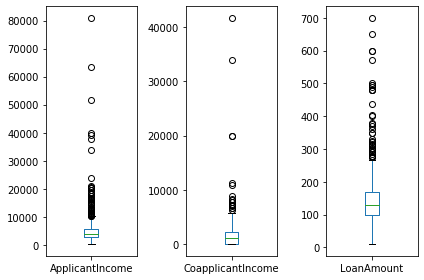

In [14]:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3)
df['ApplicantIncome'].plot.box(ax=ax1)
df['CoapplicantIncome'].plot.box(ax=ax2)
df['LoanAmount'].plot.box(ax=ax3)
fig.tight_layout()

In [ ]:
karena data memiliki jumlah outlier yang besar dan banyak maka perlu dilakukan penggantian nilai missing value untuk 
data kontinu menggunakan median dari masing masing variabel dan untuk data kategorik menggunakan modus

In [15]:
df["ApplicantIncome"]=df["ApplicantIncome"].fillna(df["ApplicantIncome"].median())
df["CoapplicantIncome"]=df["CoapplicantIncome"].fillna(df["CoapplicantIncome"].median())
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

pengecekan ulang apakah terdapat missing value atau tidak

In [16]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Visualisasi data

In [17]:
obj_cols= [*df.select_dtypes('object').columns]
obj_cols.remove('Loan_Status')
obj_cols.remove('Loan_ID')


In [18]:
num_cols= [*df.select_dtypes(['Int64', 'Float64']).columns]
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

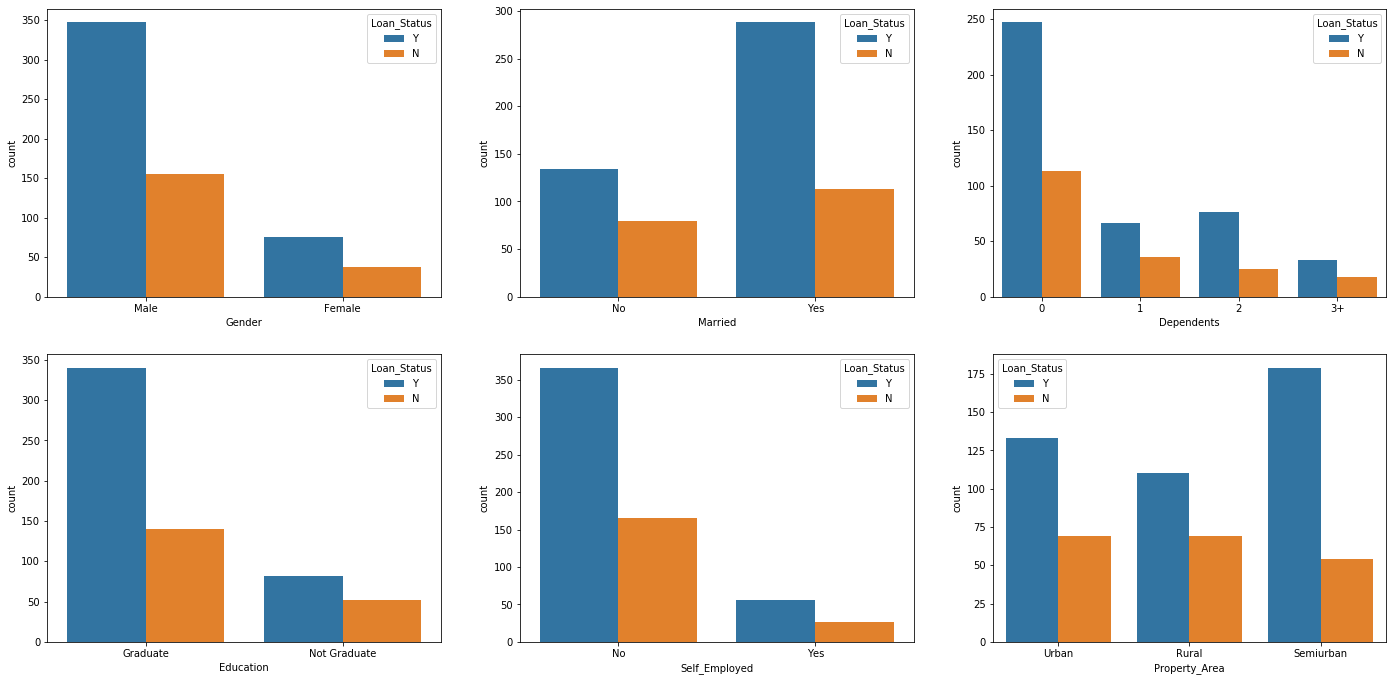

In [19]:
plt.figure(figsize=(24, 18))

for idx, cols in enumerate(obj_cols):
    
    plt.subplot(3, 3, idx+1)
    
    sns.countplot(cols, data= df, hue='Loan_Status')

Loan amount term adalah satuan bulan 

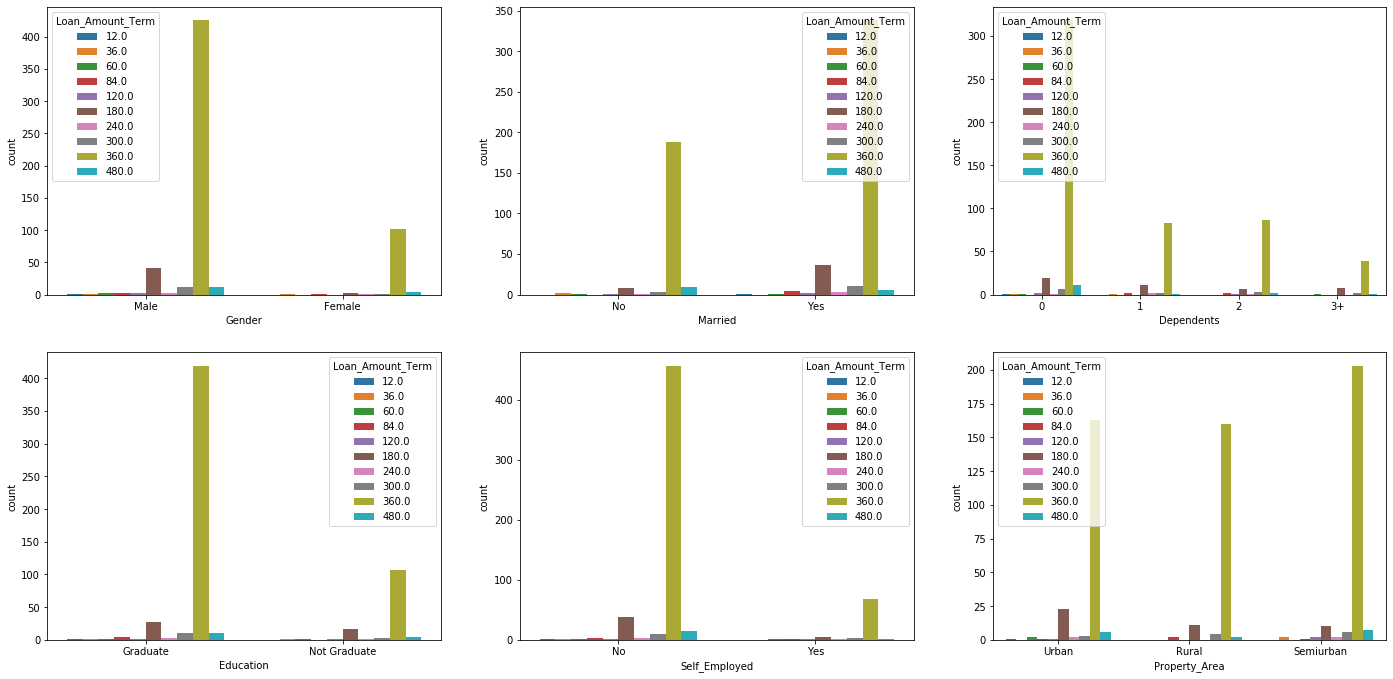

In [20]:
plt.figure(figsize=(24, 18))

for idx, cols in enumerate(obj_cols):
    
    plt.subplot(3, 3, idx+1)
    
    sns.countplot(cols, data= df, hue='Loan_Amount_Term')

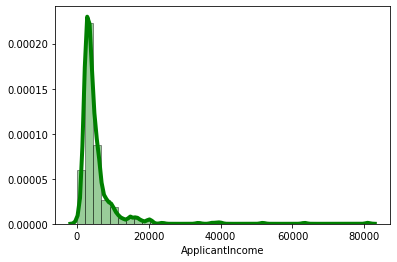

In [22]:
sns.distplot(df['ApplicantIncome'], hist=True, kde=True, bins=int(180/5),color = 'green', hist_kws={'edgecolor':'black'},kde_kws={'linewidth':4})

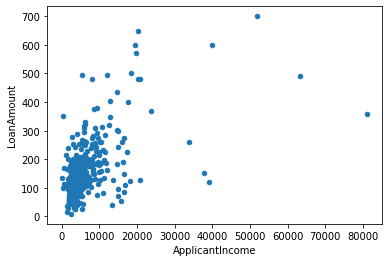

In [23]:
df.plot(x="ApplicantIncome",y="LoanAmount", kind="scatter")

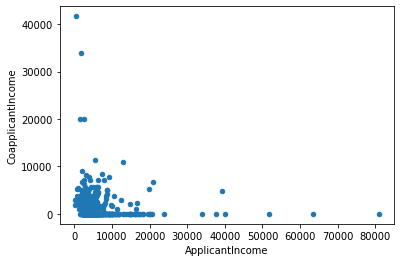

In [24]:
df.plot(x="ApplicantIncome",y="CoapplicantIncome", kind="scatter")

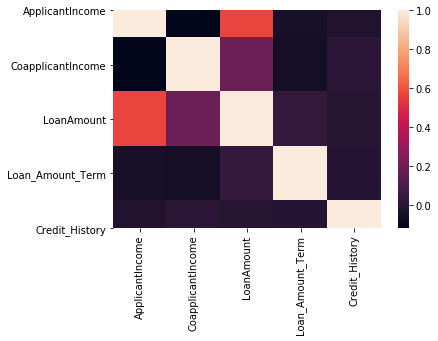

In [25]:
corr=df.corr()
sns.heatmap(corr)

In [26]:
count_Gender=[sum(1for item in df.Gender if item==('Male')),sum(1for item in df.Gender if item==('Female'))]

In [27]:
count_Gender

[502, 112]

In [28]:
label=['Male','Female']

([<matplotlib.patches.Wedge at 0xefd4708088>,
 [Text(-0.924270796186087, 0.596425599146731, 'Male'),
  Text(0.9242707961860869, -0.5964255991467311, 'Female')],
 [Text(-0.5041477070105929, 0.3253230540800351, '81.8%'),
  Text(0.5041477070105927, -0.32532305408003515, '18.2%')])

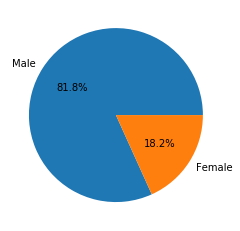

In [29]:
plt.pie(count_Gender,labels=label,autopct='%1.1f%%')

In [30]:
count_Property_Area=[sum(1for item in df.Property_Area if item==('Urban')),sum(1for item in df.Property_Area if item==('Rural')),sum(1for item in df.Property_Area if item==('Semiurban'))]

In [31]:
count_Property_Area

[202, 179, 233]

In [32]:
label=['Urban','Rural','Semiurban']

([<matplotlib.patches.Wedge at 0xefd4687d88>,
 [Text(0.5629463333458655, 0.9450351452578079, 'Urban'),
  Text(-1.086191746832758, 0.1737454722069097, 'Rural'),
  Text(0.4066109851137259, -1.0220897743275028, 'Semiurban')],
 [Text(0.30706163637047207, 0.5154737155951679, '32.9%'),
  Text(-0.5924682255451407, 0.09477025756740527, '29.2%'),
  Text(0.22178781006203227, -0.5575035132695468, '37.9%')])

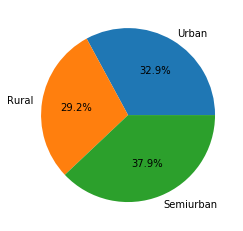

In [33]:
plt.pie(count_Property_Area,labels=label,autopct='%1.1f%%')

In [ ]:
ax = sns.countplot(x="Married", hue="Dependents", data=df)

In [ ]:
ax = sns.countplot(x="Self_Employed", hue="Loan_Status", data=df)